# Case Study - TMDB Movie Dataset

### Importing Required Libraries

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pprint
sns.set(color_codes = True)
sns.set_style('darkgrid')
%matplotlib inline

## EDA

In [77]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

## Cleaning Data

In [79]:
# Dropping Column which are not useful for our analysis
df.drop(['keywords', 'tagline', 'homepage','overview','imdb_id'],axis=1, inplace = True)

In [80]:
# checking for duplicate rows
sum(df.duplicated())

1

In [81]:
# Removing duplicates
df.drop_duplicates(inplace = True)

In [82]:
# Filling missing values
df['director'] = df['director'].fillna('Unknown')
df['production_companies'] = df['production_companies'].fillna('Unknown')
df['genres'] = df['genres'].fillna('Unknown')
df['runtime'] = df['runtime'].fillna(df['runtime'].mean())
df['cast'] = df['cast'].fillna('Unknown')

In [83]:
df['budget']=df['budget'].replace(0,df['budget'].mean())
df['revenue']=df['revenue'].replace(0,df['revenue'].mean())
df['budget_adj']=df['budget_adj'].replace(0,df['budget_adj'].mean())
df['revenue_adj']=df['revenue_adj'].replace(0,df['revenue_adj'].mean())

In [84]:
df['genres'] = df['genres'].apply(lambda x: x.split('|')[0])
df['production_companies'] = df['production_companies'].apply(lambda x: x.split('|')[0])
df['cast'] = df['cast'].apply(lambda x: x.split('|')[0])
df['director'] = df['director'].apply(lambda x: x.split('|')[0])

In [85]:
# Convert release_date (object datatype) to date.

df['release_date'] = pd.to_datetime(df['release_date'])

# Convert budget_adj and revenue_adj from float to int.

df['budget_adj'] = df['budget_adj'].astype('int64')
df['revenue_adj'] = df['revenue_adj'].astype('int64')

# convert budget and revenue from float to int.

df['budget'] = df['budget'].astype('int64')
df['revenue'] = df['revenue'].astype('int64')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10865 non-null object
director                10865 non-null object
runtime                 10865 non-null int64
genres                  10865 non-null object
production_companies    10865 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null int64
revenue_adj             10865 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(8), object(5)
memory usage: 1.4+ MB


In [87]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,Universal Studios,2015-06-09,5562,6.5,2015,137999939,1392445892
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,Village Roadshow Pictures,2015-05-13,6185,7.1,2015,137999939,348161292
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,Summit Entertainment,2015-03-18,2480,6.3,2015,101199955,271619025
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136,Action,Lucasfilm,2015-12-15,5292,7.5,2015,183999919,1902723129
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel,James Wan,137,Action,Universal Pictures,2015-04-01,2947,7.3,2015,174799923,1385748801


## Analysis

### Q1 Which genres are most popular from year to year? 

In [218]:
df = df[(df['budget']>df.budget.mean())&(df['revenue']>df.revenue.mean())]
d = df.groupby(['release_year','genres'],as_index=False).mean()

In [219]:
print("Year"," ","Popular Genres")
for y in d.release_year.unique():
    g = d[d['release_year']==y].popularity.max()
    print(y," ",d[(d['release_year']==y)&(d['popularity']==g)]['genres'].values)
    

Year   Popular Genres
1991   ['Action']
1992   ['Action']
1994   ['Action']
1995   ['Action']
1996   ['Adventure']
1997   ['Drama']
1998   ['Animation']
1999   ['Adventure']
2000   ['Family']
2001   ['Adventure']
2002   ['Adventure']
2003   ['Adventure']
2004   ['Adventure']
2005   ['Science Fiction']
2006   ['Thriller']
2007   ['Animation']
2008   ['Drama']
2009   ['Action']
2010   ['Family']
2011   ['Thriller']
2012   ['Drama']
2013   ['Crime']
2014   ['Adventure']
2015   ['Action']


### Q2 What kinds of properties are associated with movies that have high revenues?

In [220]:
df['profit_ratio'] = df['revenue']/df['budget']
df.head()
# We will consider movie with profit_ratio greater than or equal to 5 to be a high revenue movie.

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_ratio
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,Universal Studios,2015-06-09,5562,6.5,2015,137999939,1392445892,10.090192
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,Village Roadshow Pictures,2015-05-13,6185,7.1,2015,137999939,348161292,2.522909
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,Summit Entertainment,2015-03-18,2480,6.3,2015,101199955,271619025,2.683984
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136,Action,Lucasfilm,2015-12-15,5292,7.5,2015,183999919,1902723129,10.340891
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel,James Wan,137,Action,Universal Pictures,2015-04-01,2947,7.3,2015,174799923,1385748801,7.927628


In [221]:
print("List of Genres with Higher Revenue")
arr = df[df['profit_ratio']>=5]['genres'].unique()
print(arr)

List of Genres with Higher Revenue
['Action' 'Drama' 'Romance' 'Animation' 'Science Fiction' 'Adventure'
 'Family' 'Thriller' 'Fantasy' 'Comedy']


In [222]:
print("List of Cast Engadged with Higher Revenue Movies "+"\n")
arr = df[df['profit_ratio']>=5]['cast'].unique()
arr

List of Cast Engadged with Higher Revenue Movies 



array(['Chris Pratt', 'Harrison Ford', 'Vin Diesel', 'Matt Damon',
       'Robert Downey Jr.', 'Lily James', 'Adam Sandler',
       'Jennifer Lawrence', 'Sam Worthington', 'Ray Romano',
       'Shia LaBeouf', 'Leonardo DiCaprio', 'Mia Wasikowska', 'Tom Hanks',
       'Liam Neeson', 'Brendan Fraser', 'Elijah Wood', 'Daniel Radcliffe',
       'George Clooney', 'Christian Bale', 'Andy Serkis',
       'Kristen Stewart', 'Jesse Eisenberg', 'Neil Patrick Harris',
       'Tobey Maguire', 'Ewan McGregor', 'Daniel Craig', 'Suraj Sharma',
       'John Leguizamo', 'Ben Stiller', 'Albert Brooks', 'Jim Carrey',
       'Kate Winslet', 'Tommy Lee Jones', 'Kristen Bell',
       'Sandra Bullock', 'Steve Carell', 'Johnny Depp', 'Craig T. Nelson',
       'Mike Myers', 'Tom Cruise', 'Helen Hunt', 'Arnold Schwarzenegger'],
      dtype=object)

###  Q3 Top 5 directors based on their movie rating

In [223]:
# Average vote count
df.vote_count.mean()

2354.9746376811595

In [229]:
print("Top 5 directors with highest popularity and vote_count greater than average")
arr = df[df['vote_count']>df.vote_count.mean()].sort_values(by=['popularity'], ascending=False).head(5)
print(arr.director.unique())

Top 5 directors with highest popularity and vote_count greater than average
['Colin Trevorrow' 'George Miller' 'Christopher Nolan' 'James Gunn'
 'Robert Schwentke']


### Q4 Top 5 production companies based on revenue

In [230]:
d = df.groupby('production_companies').mean()
e = d.sort_values(by='popularity',ascending=False).head(5)
e

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_ratio
production_companies,,,,,,,,,,,
Universal Studios,67864.000000,16.576398,1.215000e+08,9.411548e+08,108.000000,3464.000000,6.050000,2008.000000,1.262642e+08,9.232975e+08,7.027789
Regency Enterprises,281957.000000,9.110700,1.350000e+08,5.329505e+08,156.000000,3929.000000,7.200000,2015.000000,1.241999e+08,4.903142e+08,3.947782
Lionsgate,116465.000000,7.830142,1.275000e+08,7.997618e+08,134.500000,3929.500000,7.000000,2013.500000,1.184104e+08,7.429847e+08,6.267722
Marvel Studios,55892.636364,7.205610,1.790909e+08,7.863884e+08,126.090909,5182.090909,7.072727,2012.363636,1.698693e+08,7.433369e+08,4.224931
1492 Pictures,672.000000,6.620596,1.183333e+08,8.809895e+08,151.333333,3757.666667,7.266667,2002.333333,1.417467e+08,1.059027e+09,7.551370


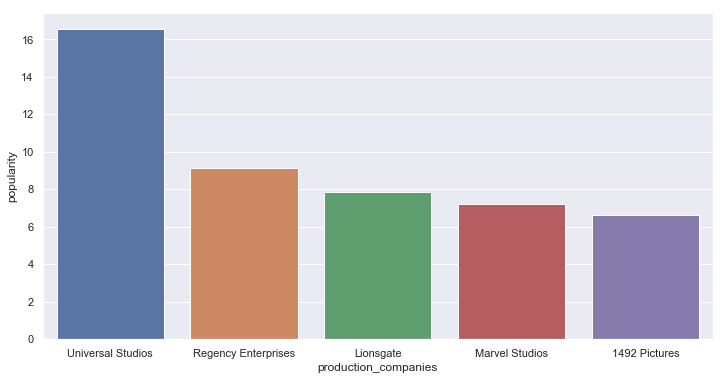

In [231]:
plt.figure(figsize=(12,6))
sns.barplot(e.index,e.popularity);

### Q5 Does budget correlate with popularity? What about the movies with the biggest budget?

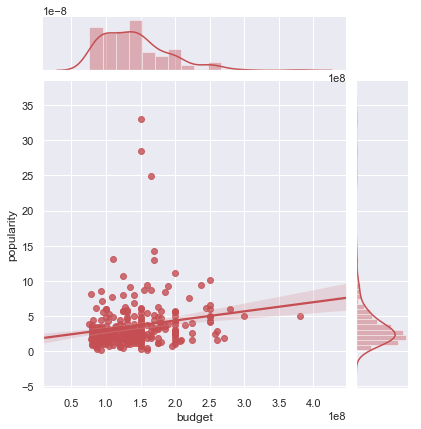

In [237]:
sns.jointplot('budget','popularity',data=df, kind='reg',color='r');

Have a positive relation but not very strong correlation